In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler , StandardScaler , RobustScaler
from sklearn.model_selection import train_test_split


df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.00,Mobile Phone,3,6.00,Debit Card,Female,3.00,3,Laptop & Accessory,2,Single,9,1,11.00,1.00,1.00,5.00,159.93
1,50002,1,NaN,Phone,1,8.00,UPI,Male,3.00,4,Mobile,3,Single,7,1,15.00,0.00,1.00,0.00,120.90
2,50003,1,NaN,Phone,1,30.00,Debit Card,Male,2.00,4,Mobile,3,Single,6,1,14.00,0.00,1.00,3.00,120.28
3,50004,1,0.00,Phone,3,15.00,Debit Card,Male,2.00,4,Laptop & Accessory,5,Single,8,0,23.00,0.00,1.00,3.00,134.07
4,50005,1,0.00,Phone,1,12.00,CC,Male,NaN,3,Mobile,5,Single,3,0,11.00,1.00,1.00,3.00,129.60


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.00,52815.50,1625.39,50001.00,51408.25,52815.50,54222.75,55630.00
Churn,5630.00,0.17,0.37,0.00,0.00,0.00,0.00,1.00
Tenure,5366.00,10.19,8.56,0.00,2.00,9.00,16.00,61.00
CityTier,5630.00,1.65,0.92,1.00,1.00,1.00,3.00,3.00
WarehouseToHome,5379.00,15.64,8.53,5.00,9.00,14.00,20.00,127.00
HourSpendOnApp,5375.00,2.93,0.72,0.00,2.00,3.00,3.00,5.00
NumberOfDeviceRegistered,5630.00,3.69,1.02,1.00,3.00,4.00,4.00,6.00
SatisfactionScore,5630.00,3.07,1.38,1.00,2.00,3.00,4.00,5.00
NumberOfAddress,5630.00,4.21,2.58,1.00,2.00,3.00,6.00,22.00
Complain,5630.00,0.28,0.45,0.00,0.00,0.00,1.00,1.00


In [42]:
df.duplicated().sum()

0

In [43]:
unique_values = {col: df[col].unique() for col in df.columns}
for col, values in unique_values.items():
    print(f" '{col}': {values}")

 'CustomerID': [50001 50002 50003 ... 55628 55629 55630]
 'Churn': [1 0]
 'Tenure': [ 4. nan  0. 13. 11.  9. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.
  6. 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 50. 60. 31. 51.
 61.]
 'PreferredLoginDevice': ['Mobile Phone' 'Phone' 'Computer']
 'CityTier': [3 1 2]
 'WarehouseToHome': [  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  nan  10.  27.  17.  23.  33.  19.  35.  24.  16.  25.  32.
  34.   5.  21. 126.   7.  36. 127.]
 'PreferredPaymentMode': ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
 'Gender': ['Female' 'Male']
 'HourSpendOnApp': [ 3.  2. nan  1.  0.  4.  5.]
 'NumberOfDeviceRegistered': [3 4 5 2 1 6]
 'PreferedOrderCat': ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
 'SatisfactionScore': [2 3 5 4 1]
 'MaritalStatus': ['Single' 'Divorced' 'Married']
 'NumberOfAddress': [ 9  7  6  8  3  2  4 10  1  5 19 21 11 20 22]
 'Complain': 

## Data Preprocessing

#### For PreferredLoginDevice and PreferedOrderCat columns, Mobile Phone and Phone indicate the same item. Also, in PreferredPaymentMode column, COD is equavilent to Cash on Delivery, and CC is Credir Card. Therefore, we'll drop duplicated values. 

In [44]:
df.loc[df['PreferredLoginDevice'] == 'Phone', 'PreferredLoginDevice' ] = 'Mobile Phone'
df.loc[df['PreferedOrderCat'] == 'Mobile', 'PreferedOrderCat' ] = 'Mobile Phone'
df.loc[df['PreferredPaymentMode'] == 'COD', 'PreferredPaymentMode' ] = 'Cash on Delivery'
df.loc[df['PreferredPaymentMode'] == 'CC', 'PreferredPaymentMode' ] = 'Credit Card'

In [45]:
df['PreferredPaymentMode'].value_counts()

PreferredPaymentMode
Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: count, dtype: int64

### Handling Missing Values

In [46]:
round((df.isnull().sum()*100 / df.shape[0]),2)

CustomerID                    0.00
Churn                         0.00
Tenure                        4.69
PreferredLoginDevice          0.00
CityTier                      0.00
WarehouseToHome               4.46
PreferredPaymentMode          0.00
Gender                        0.00
HourSpendOnApp                4.53
NumberOfDeviceRegistered      0.00
PreferedOrderCat              0.00
SatisfactionScore             0.00
MaritalStatus                 0.00
NumberOfAddress               0.00
Complain                      0.00
OrderAmountHikeFromlastYear   4.71
CouponUsed                    4.55
OrderCount                    4.58
DaySinceLastOrder             5.45
CashbackAmount                0.00
dtype: float64

In [47]:
for col in df.select_dtypes(include=['number']).columns:
    df[col] = df[col].fillna(df[col].median())

### Convert Int Features to Categorical Features

### Detect / Remove Outliers

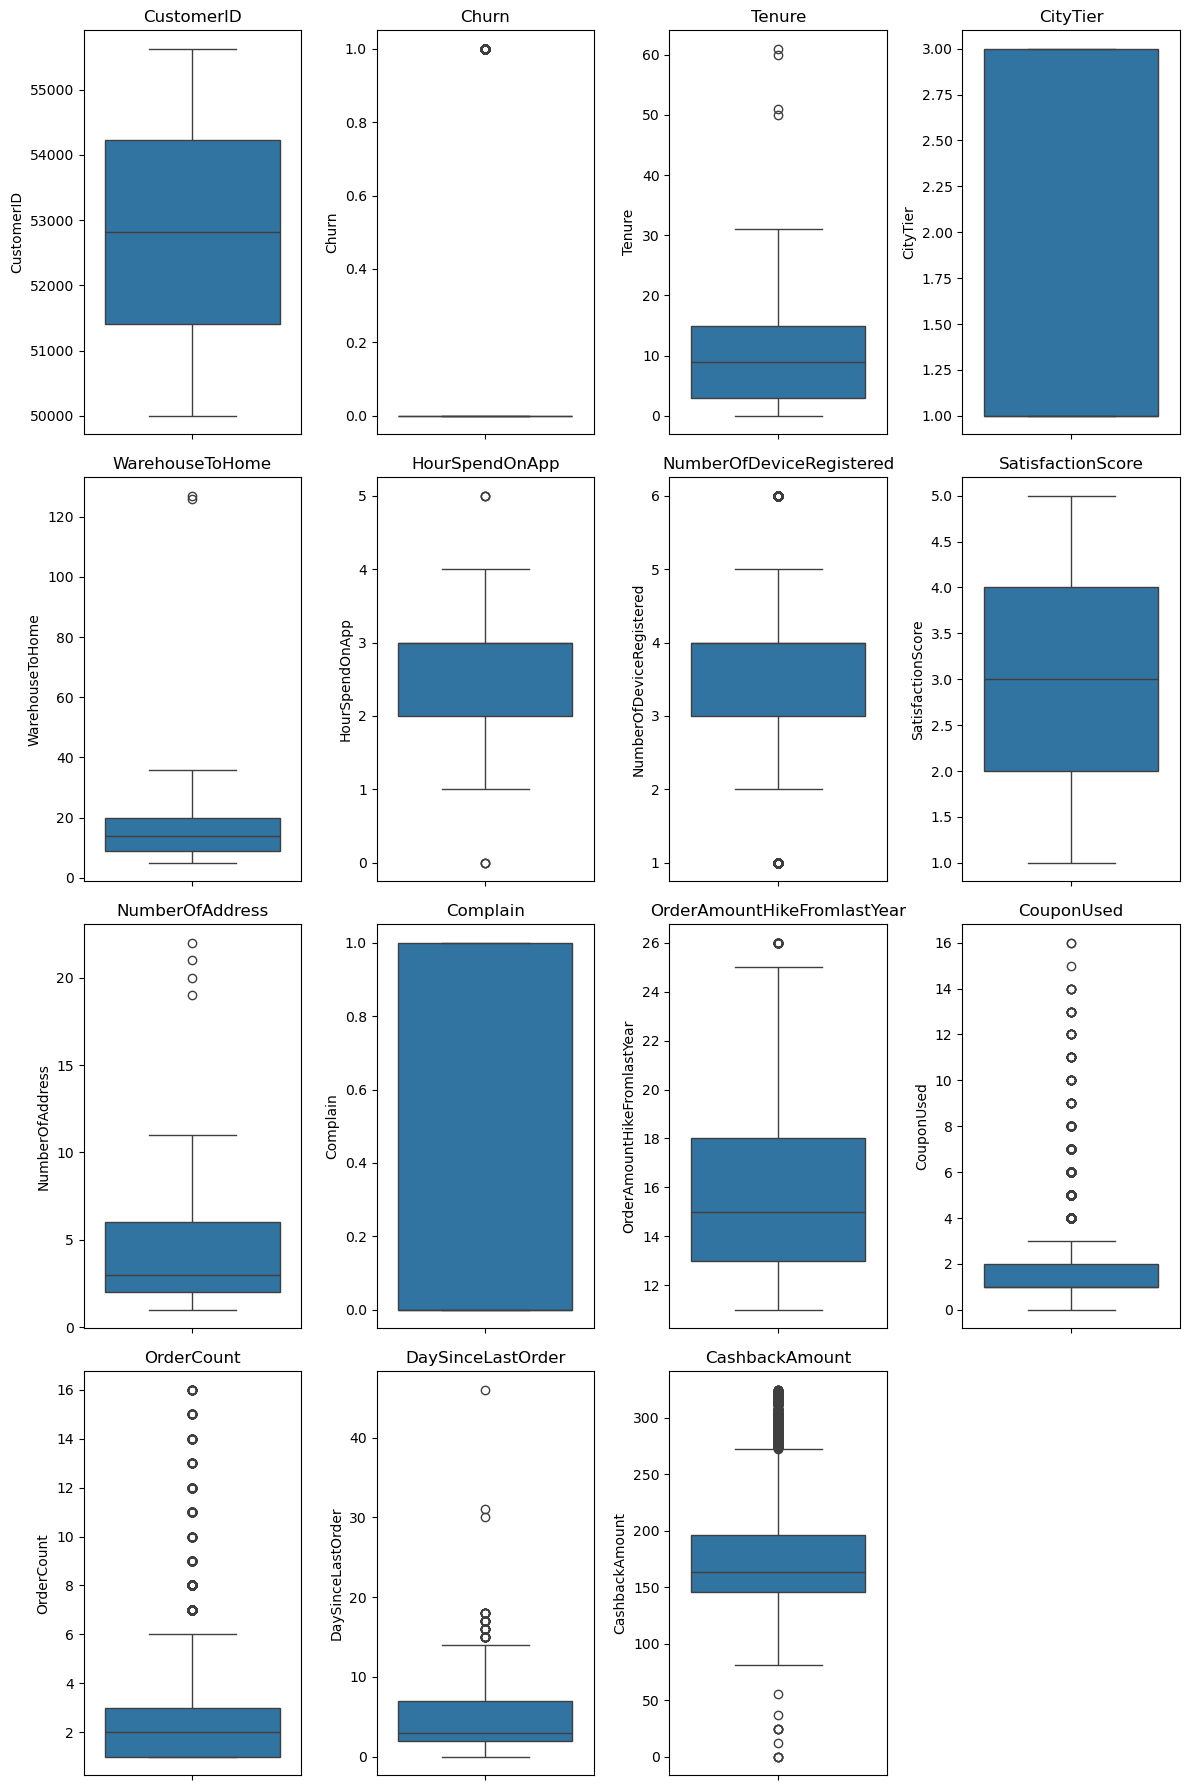

In [48]:
num_cols = df.select_dtypes(include=['number']).columns

fig = plt.figure(figsize=(12, 18))

for i, col in enumerate(num_cols):
    ax = fig.add_subplot((len(num_cols) + 3) // 4, 4, i + 1)
    sns.boxplot(y=df[col])
    ax.set_title(col)

plt.tight_layout()
plt.show()

In [49]:
Q1 = df['Tenure'].quantile(0.25)
Q3 = df['Tenure'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Tenure'] < lower_bound) | (df['Tenure'] > upper_bound)]


In [50]:
def find_iqr_bounds(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    filtered_df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return filtered_df

cols_outliers = ['Tenure', 'WarehouseToHome', 'NumberOfAddress', 'DaySinceLastOrder', 'HourSpendOnApp', 'NumberOfDeviceRegistered']

for col in cols_outliers:
    df = find_iqr_bounds(df, col)

df.head()


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.00,Mobile Phone,3,6.00,Debit Card,Female,3.00,3,Laptop & Accessory,2,Single,9,1,11.00,1.00,1.00,5.00,159.93
1,50002,1,9.00,Mobile Phone,1,8.00,UPI,Male,3.00,4,Mobile Phone,3,Single,7,1,15.00,0.00,1.00,0.00,120.90
2,50003,1,9.00,Mobile Phone,1,30.00,Debit Card,Male,2.00,4,Mobile Phone,3,Single,6,1,14.00,0.00,1.00,3.00,120.28
3,50004,1,0.00,Mobile Phone,3,15.00,Debit Card,Male,2.00,4,Laptop & Accessory,5,Single,8,0,23.00,0.00,1.00,3.00,134.07
4,50005,1,0.00,Mobile Phone,1,12.00,Credit Card,Male,3.00,3,Mobile Phone,5,Single,3,0,11.00,1.00,1.00,3.00,129.60


### After Outlier Filtered

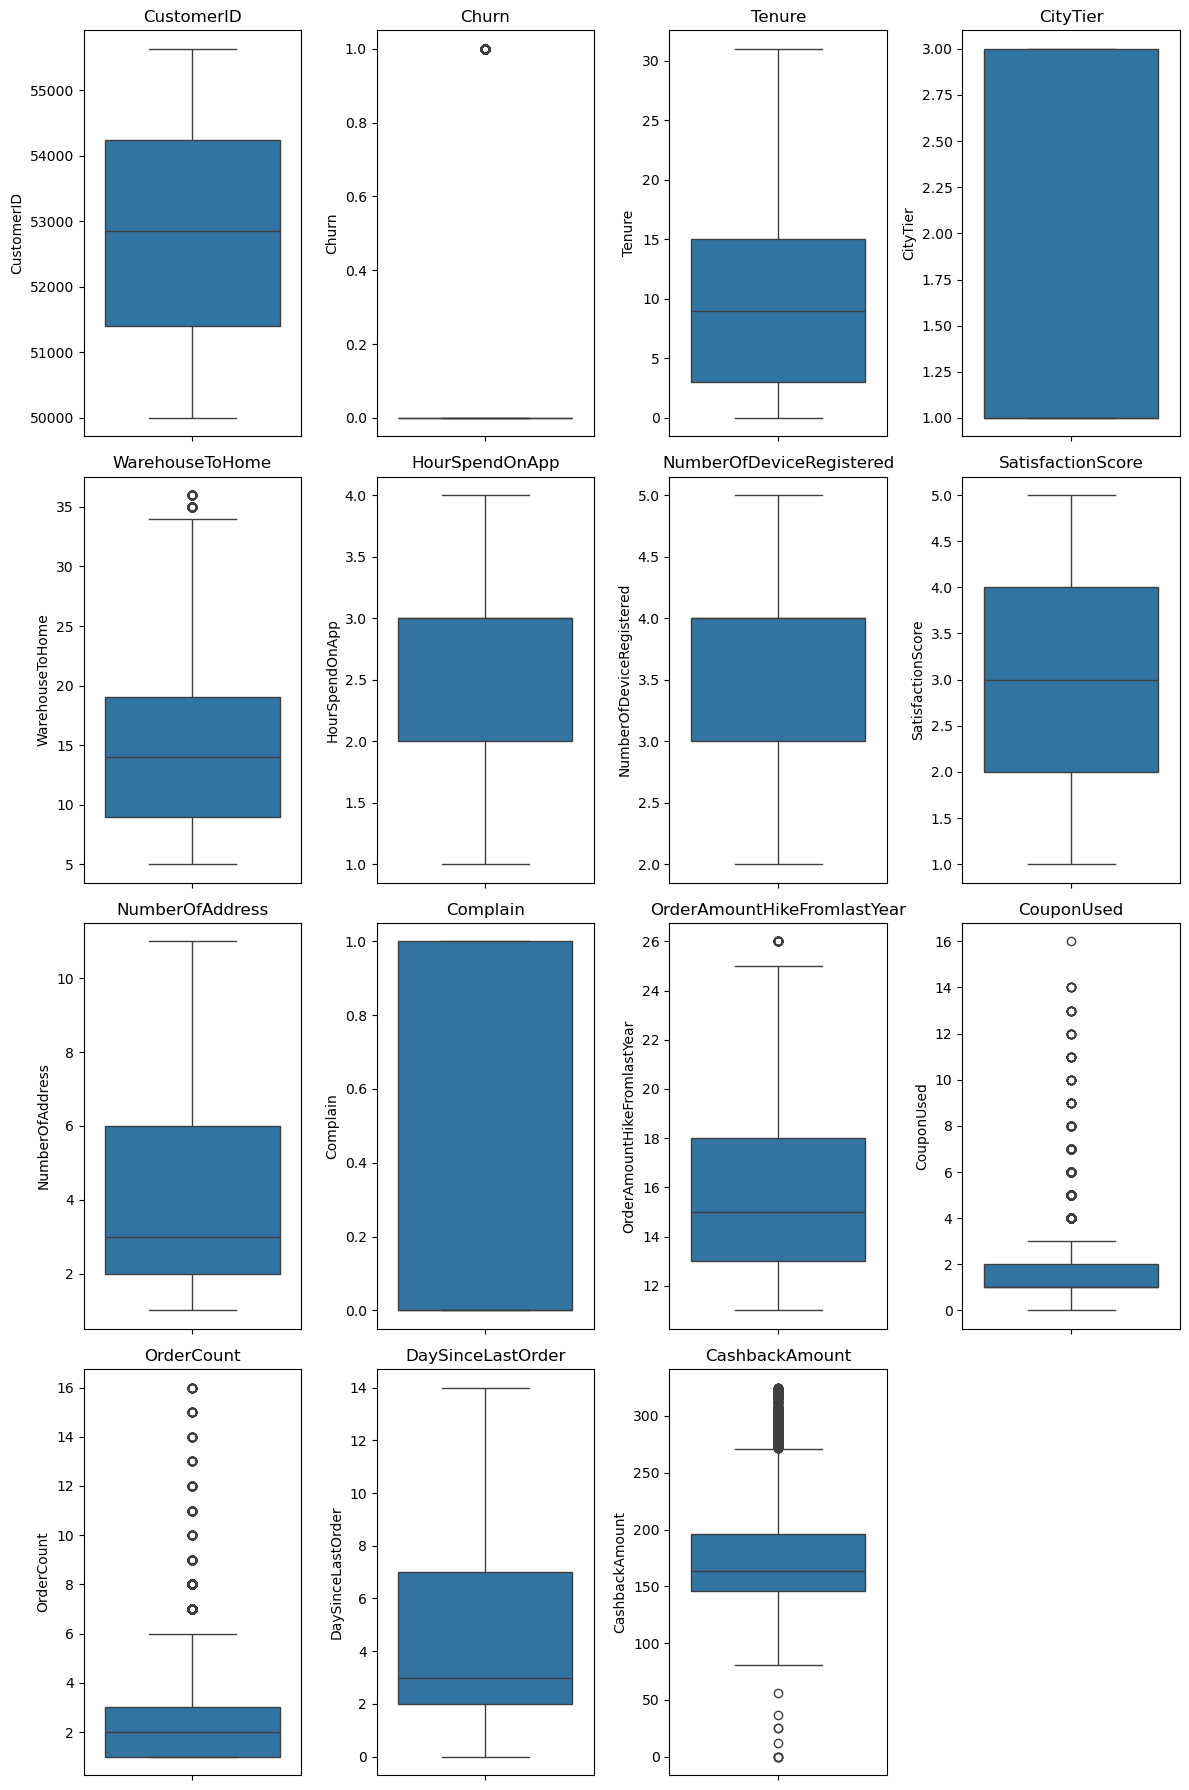

In [51]:
num_cols = df.select_dtypes(include=['number']).columns

fig = plt.figure(figsize=(12, 18))

for i, col in enumerate(num_cols):
    ax = fig.add_subplot((len(num_cols) + 3) // 4, 4, i + 1)
    sns.boxplot(y=df[col])
    ax.set_title(col)

plt.tight_layout()
plt.show()

In [52]:
csv_file = 'E Commerce.csv' 
df.to_csv(csv_file, index=False)

## Exploratory Data Analysis

### Distribution of Categorical Features 

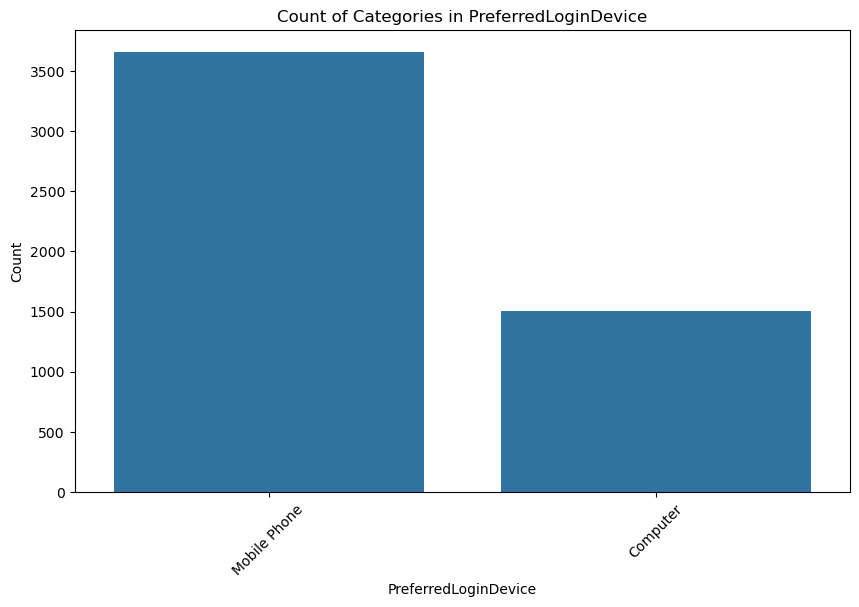

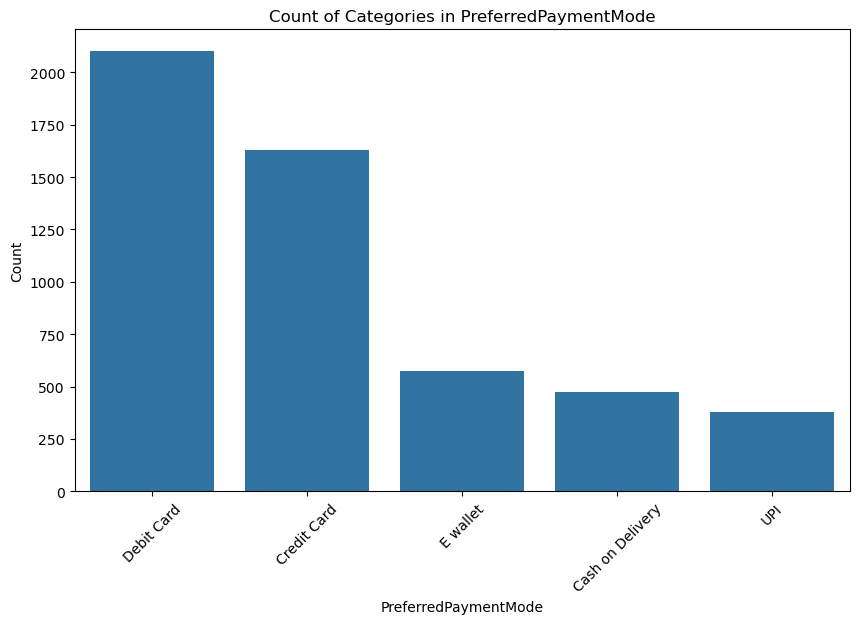

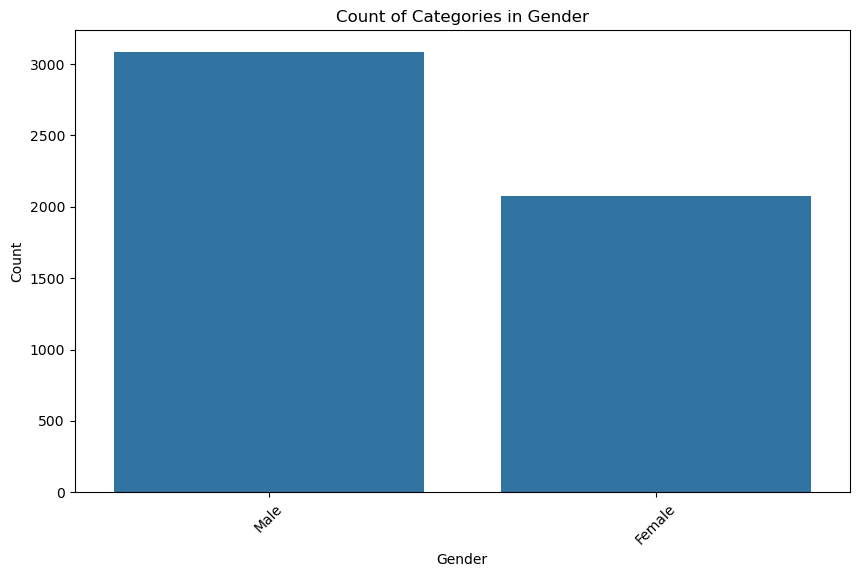

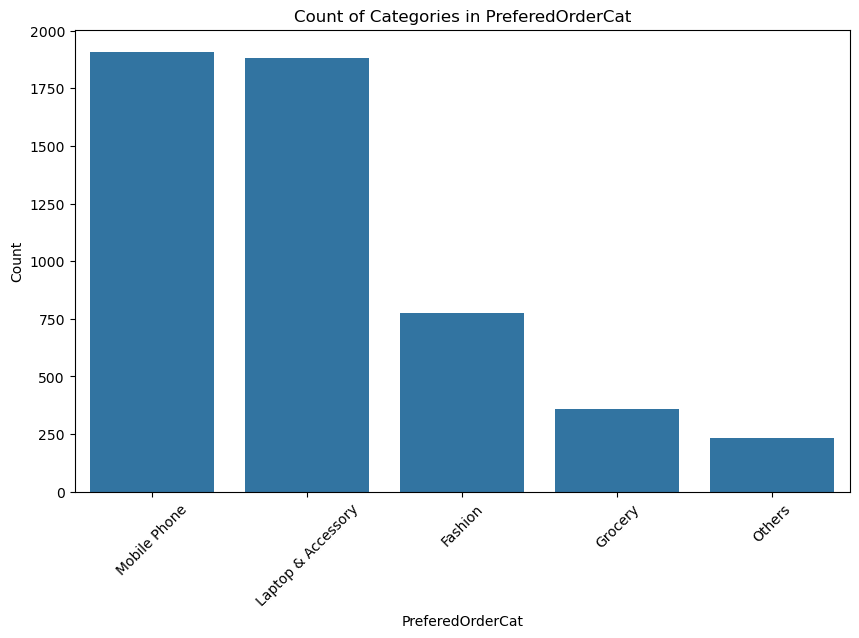

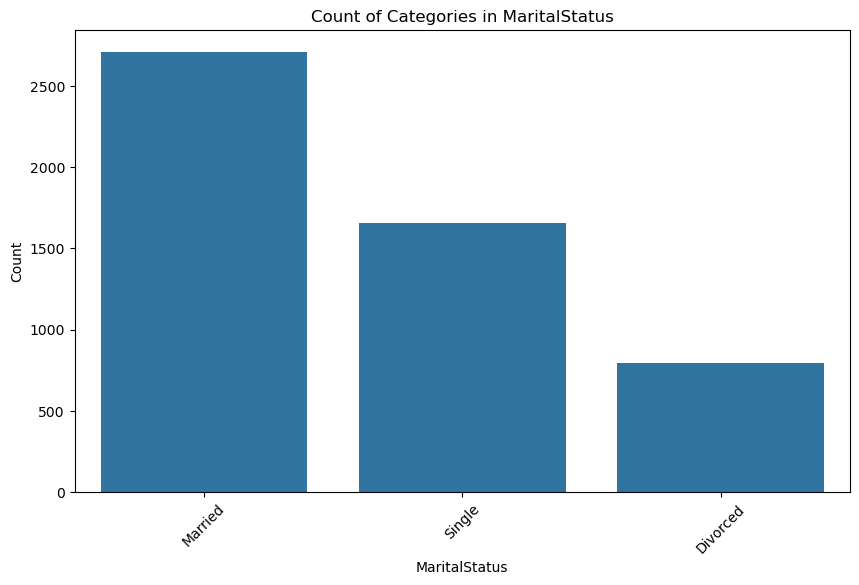

In [53]:
object_columns  = df.select_dtypes(include=['object']).columns
def plot_categorical_distribution(df, object_columns):
    for col in object_columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=col, data=df, order=df[col].value_counts().index)
        plt.title(f'Count of Categories in {col}')
        plt.ylabel('Count')
        plt.xlabel(col)
        plt.xticks(rotation=45)
        plt.show()

plot_categorical_distribution(df, object_columns)

### Distribution of Numerical Features

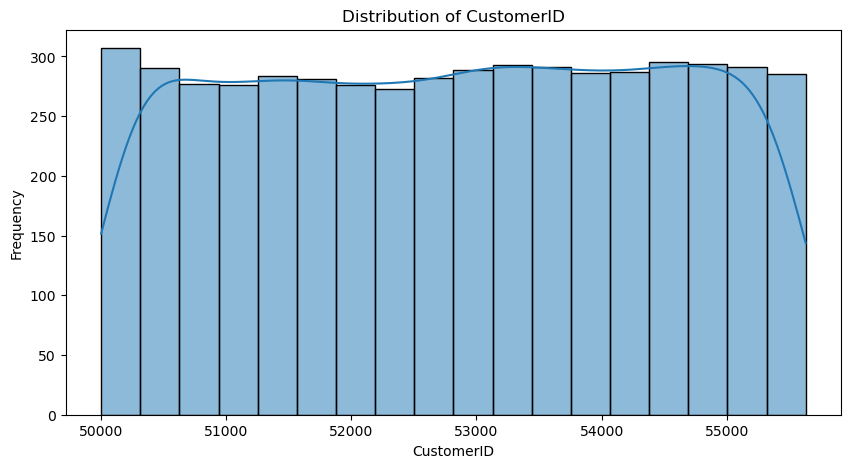

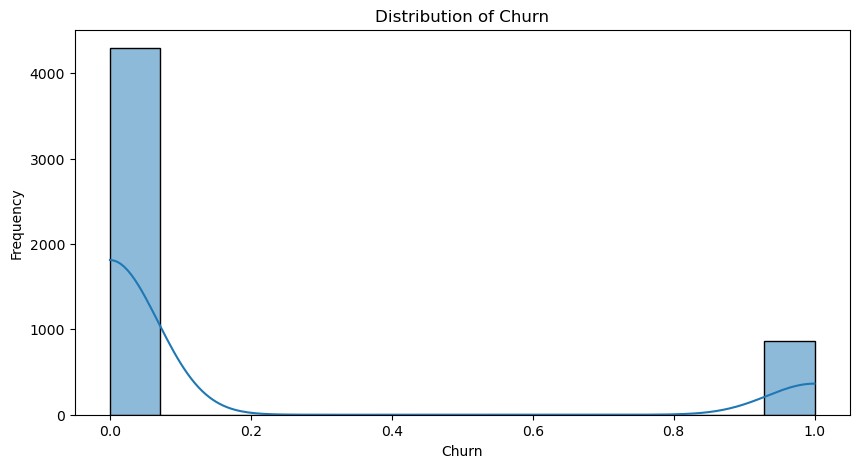

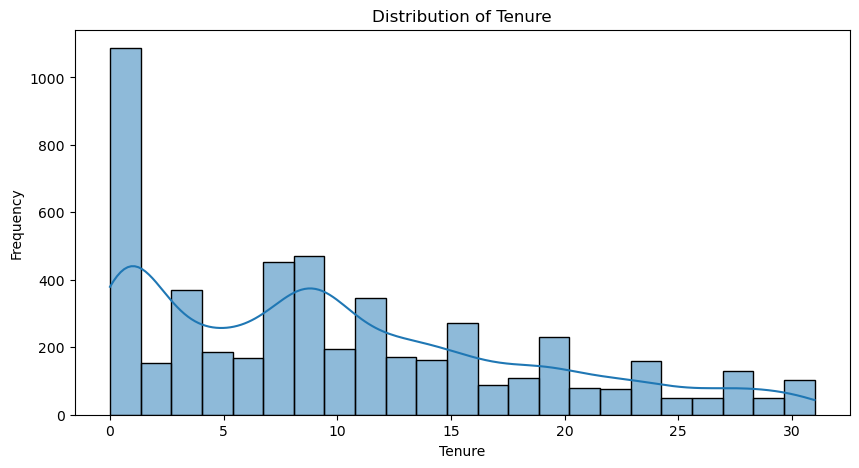

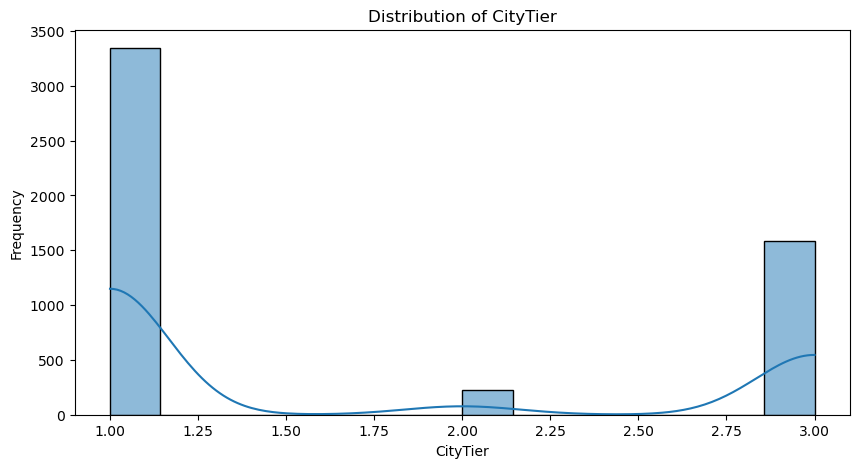

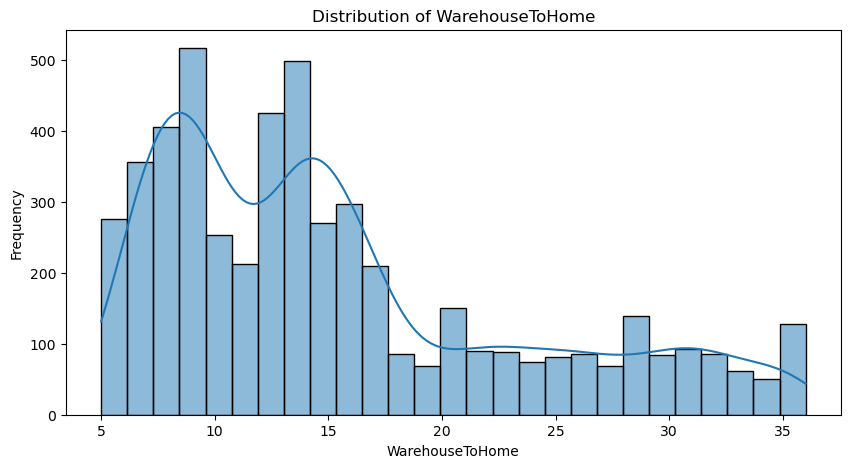

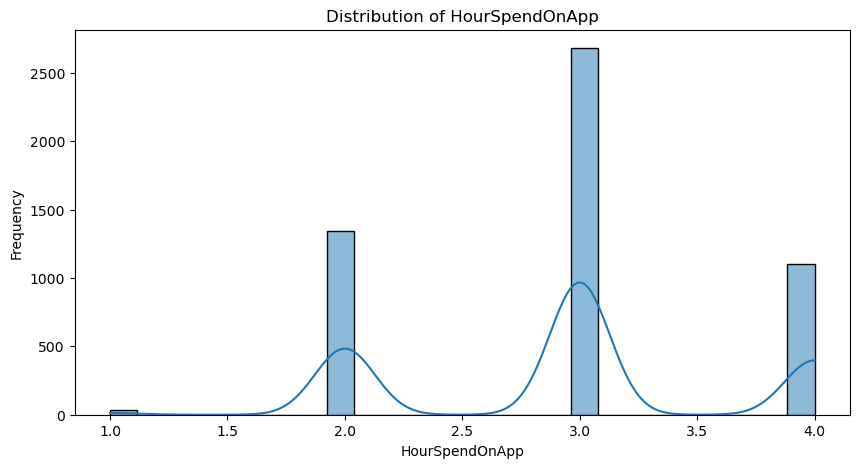

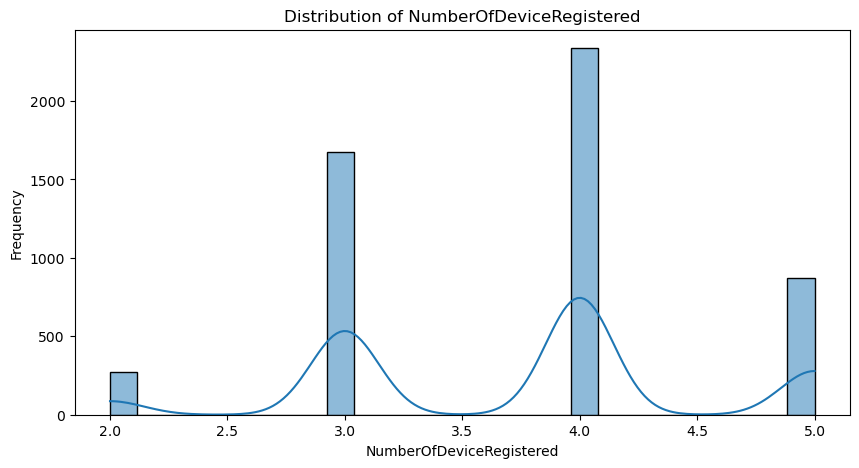

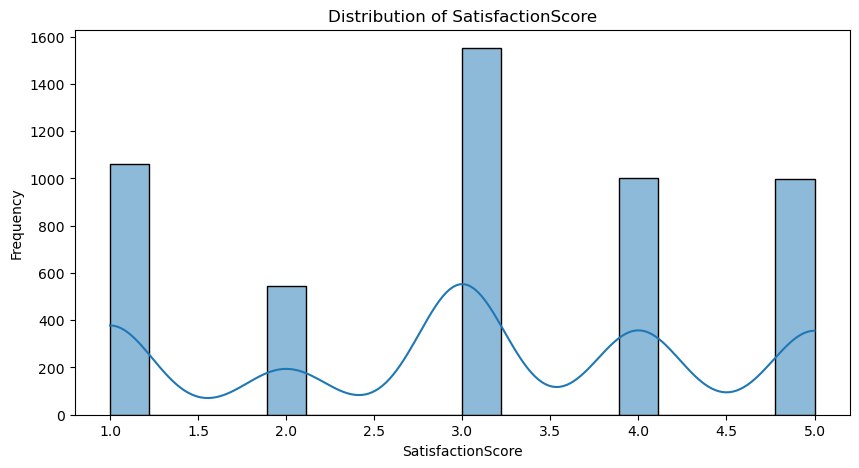

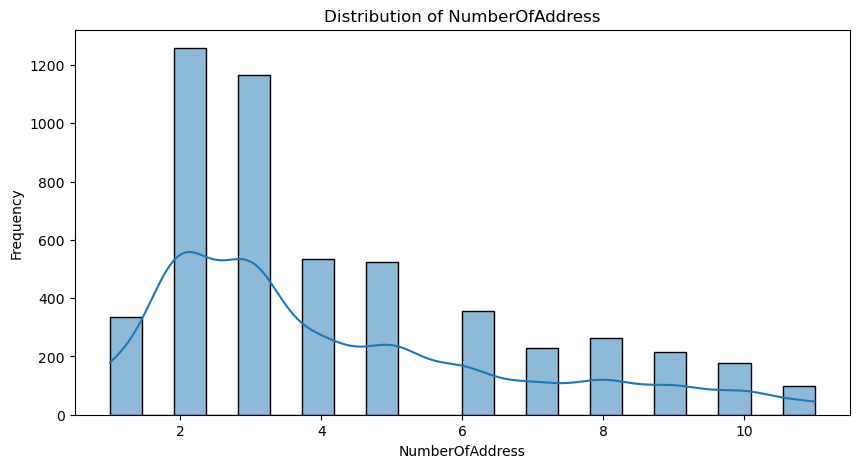

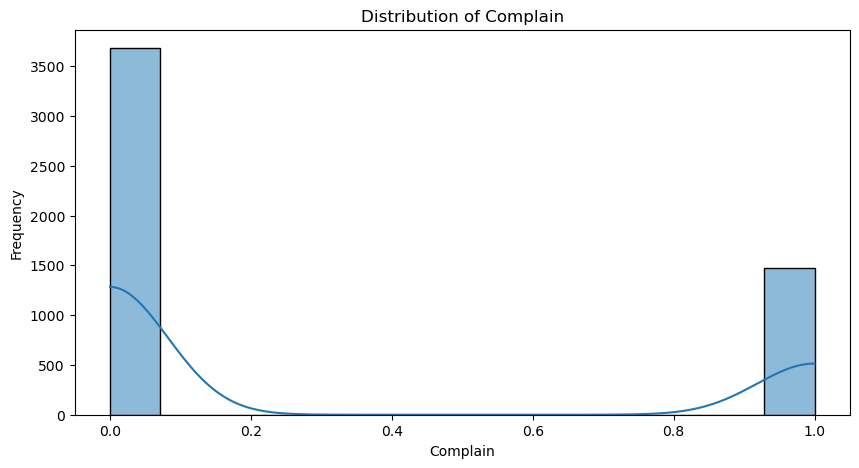

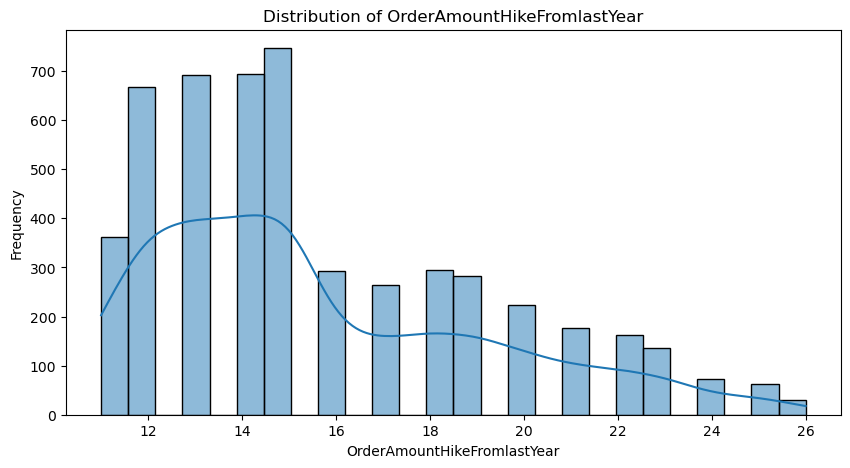

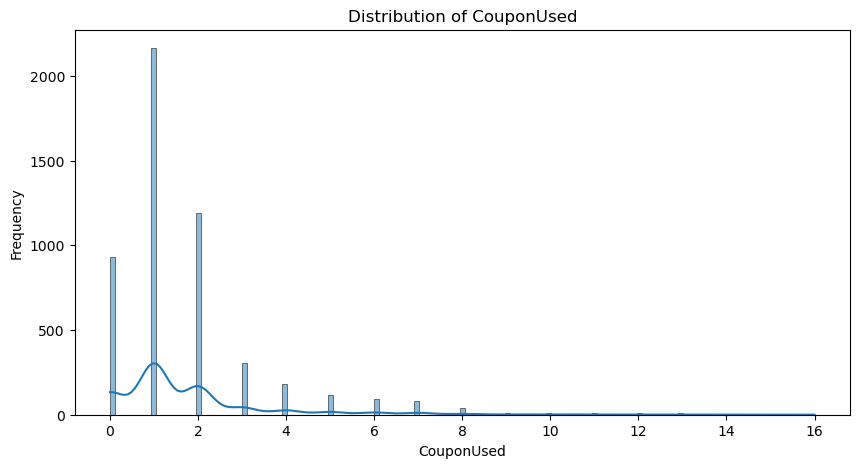

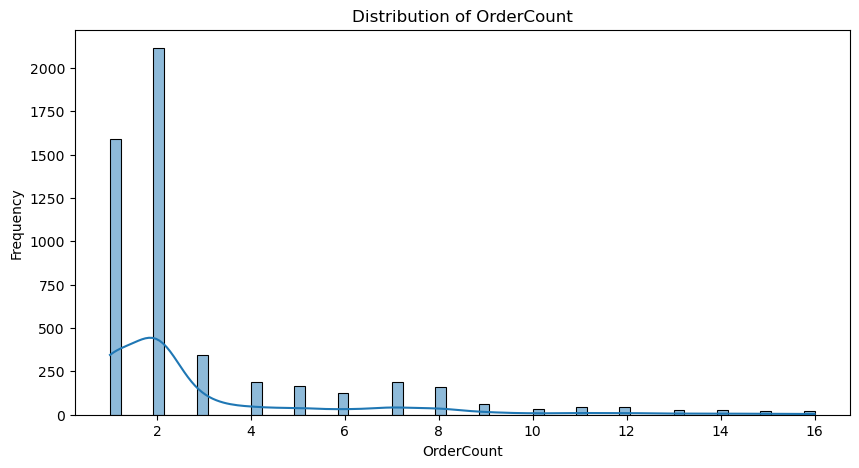

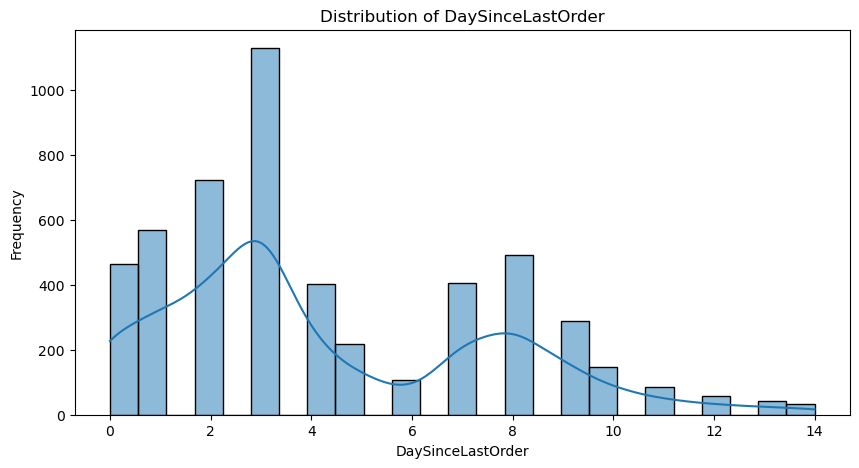

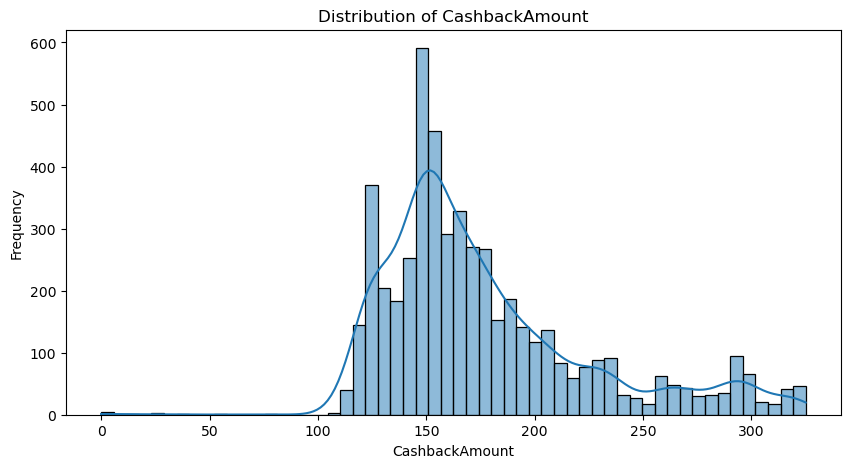

In [54]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

def plot_numerical_distributions(df, numerical_columns):
    for col in numerical_columns:
        plt.figure(figsize=(10, 5))
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

plot_numerical_distributions(df, numerical_columns)

### Univariate Analysis of Numerical Features with Resepct to Churn

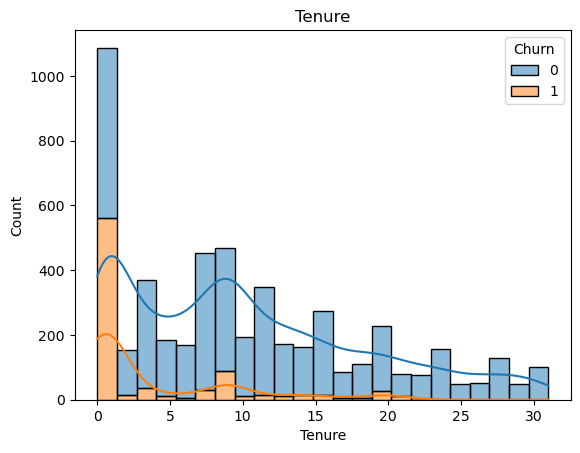

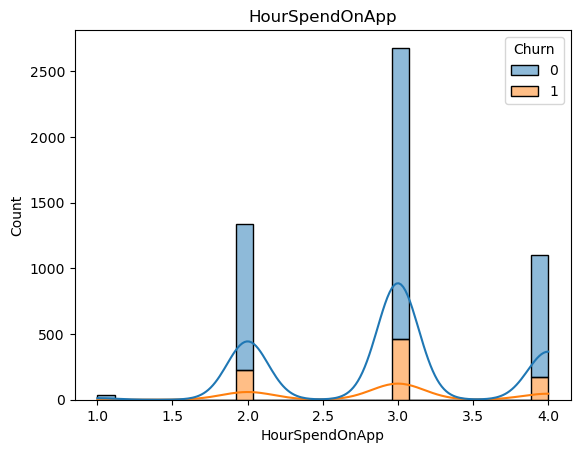

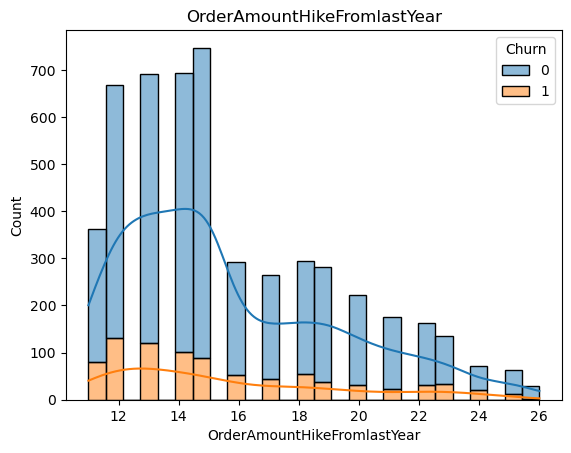

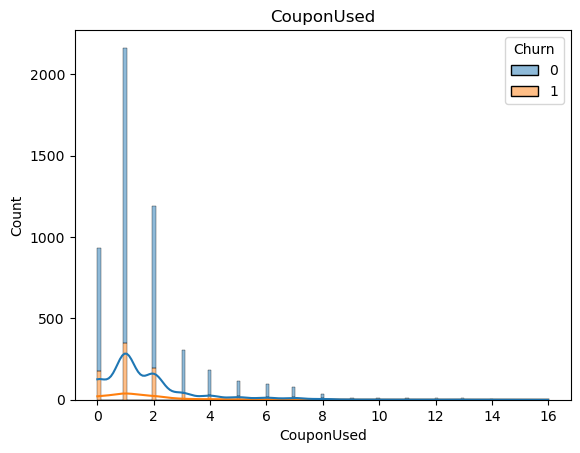

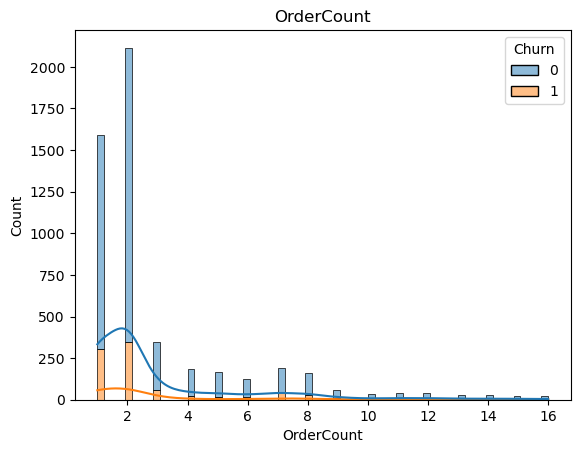

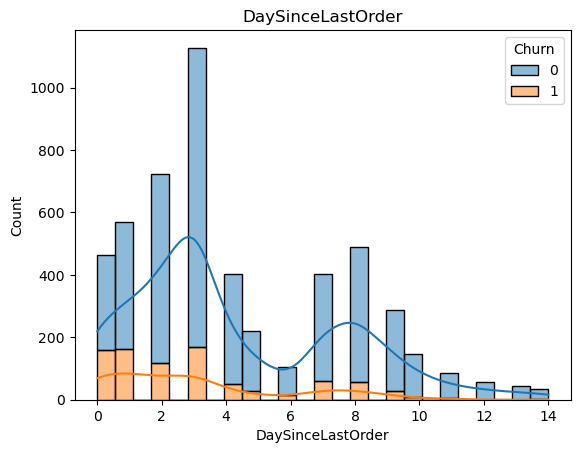

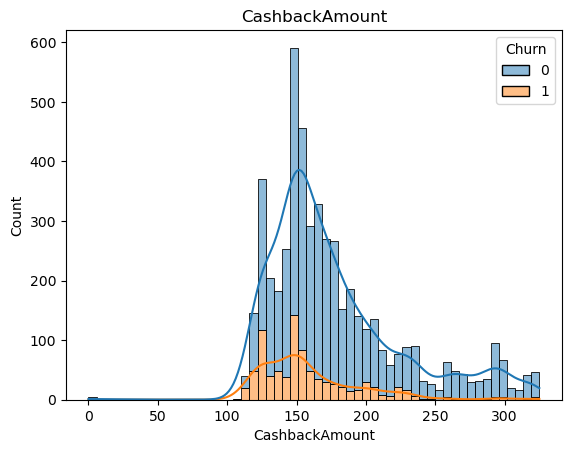

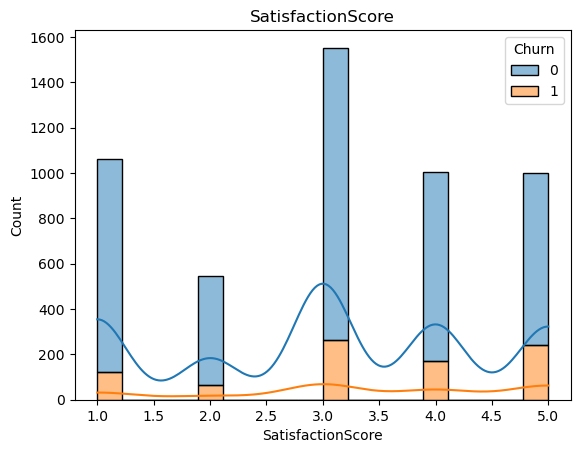

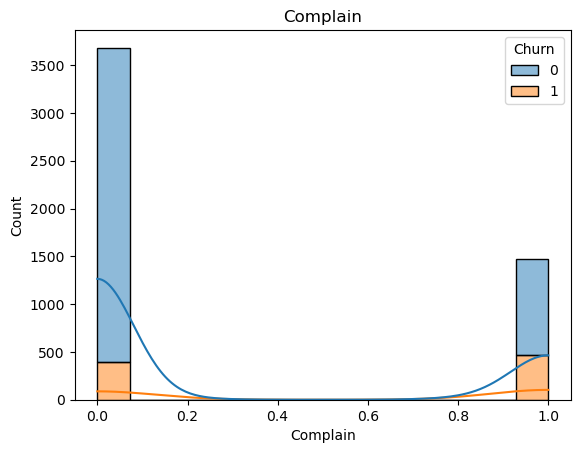

In [55]:
numerical = [ 'Tenure', 'HourSpendOnApp','OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 
            'DaySinceLastOrder', 'CashbackAmount','SatisfactionScore', 'Complain']
for i in df[numerical].columns:
  if(df[i].dtype == 'object'):
    plt.title(i)
    sns.countplot(df[i], hue = df['Churn'])
    plt.show()
  else:
    plt.title(i)
    sns.histplot(x=df[i], hue = df['Churn'], data = df, multiple = 'stack', kde=True)
    plt.show()

### Univariate Analysis of Categorical Features with respect to Churn

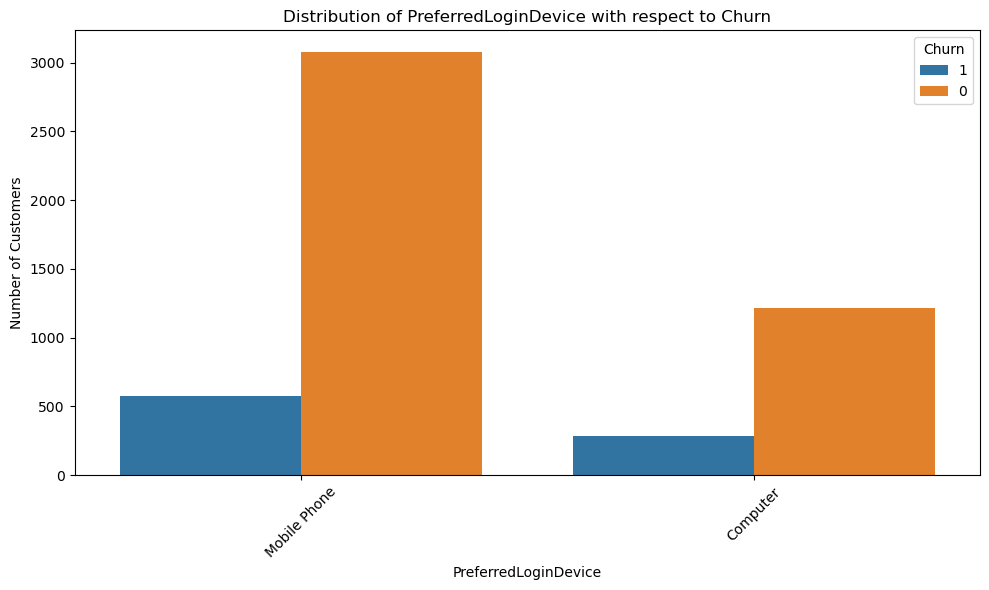

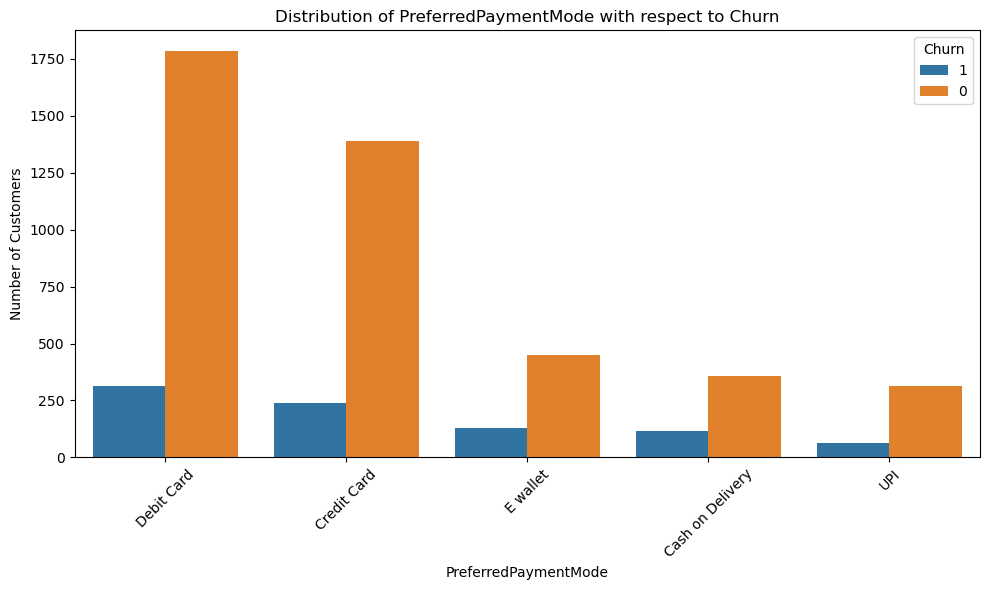

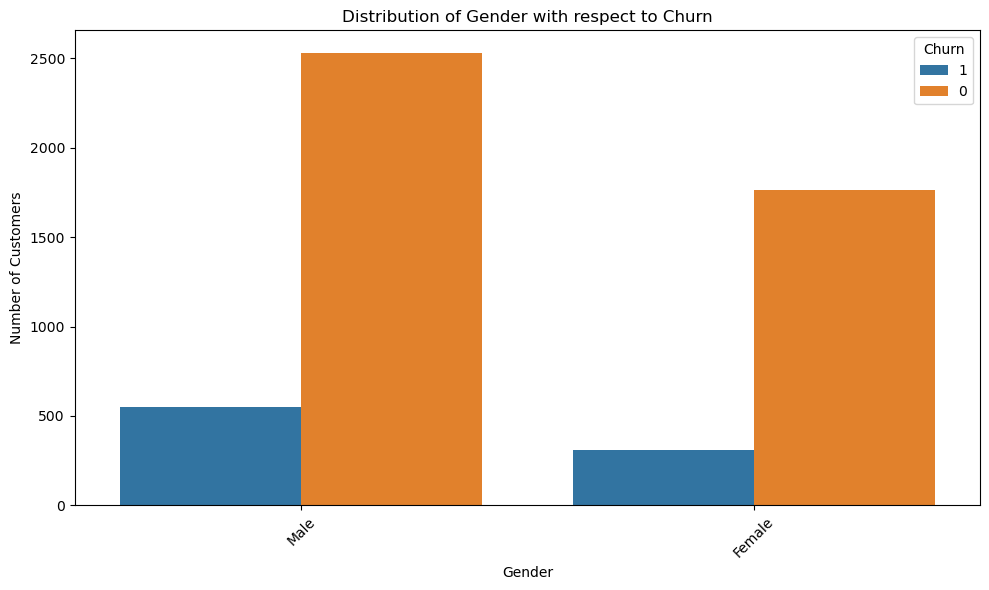

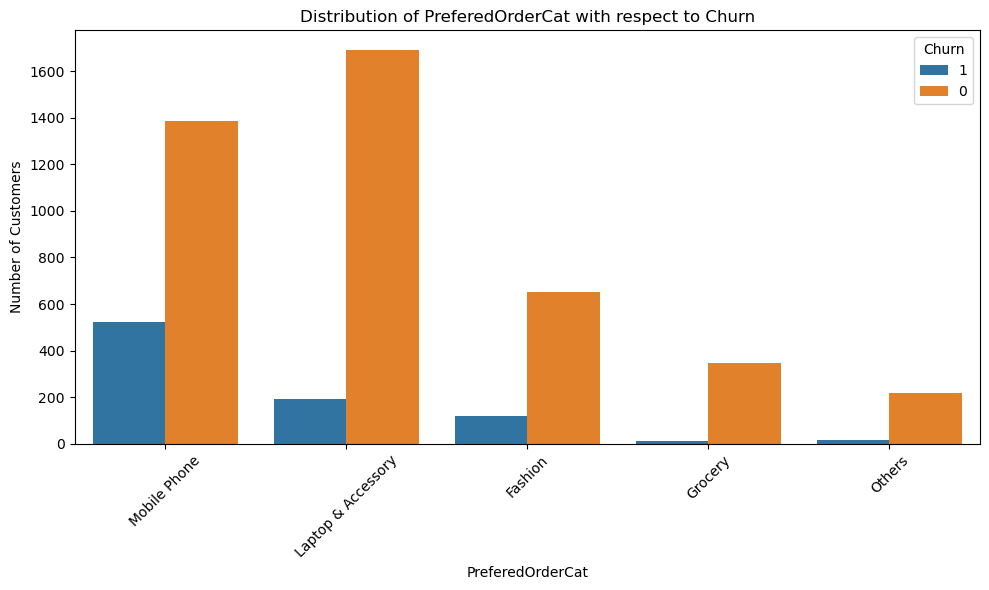

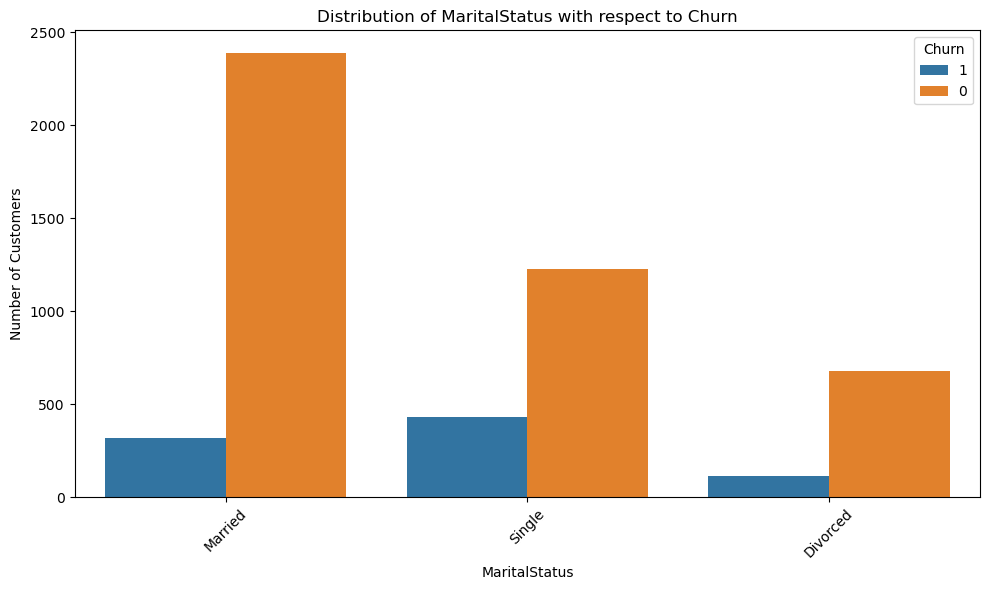

In [56]:
object_columns = df.select_dtypes(include='object').columns
df['Churn'] = df['Churn'].astype(str)

def plot_churn_count_by_categories(df, churn_column, object_columns):
    for category_column in object_columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=category_column, hue=churn_column, data=df, order = df[category_column].value_counts().index)
        plt.title(f'Distribution of {category_column} with respect to Churn')
        plt.xlabel(category_column)
        plt.ylabel('Number of Customers')
        plt.legend(title='Churn', loc='upper right')
        plt.xticks(rotation=45)
        plt.tight_layout()  # Adjust subplots to fit into figure area.
        plt.show()

plot_churn_count_by_categories(df, 'Churn', object_columns)

We can observe that:
1. Customers with 0-5 years of tenure are most likely to churn.
2. Customers who placed the last order 0-8 days ago are more likely to churn. 
3. Customers who have placed 0-8 orders in last month are more likely to churn.
4. Customers whose average cashback amount is between 100-240 are more likely to churn.
5. Customers who spent 3 hours on mobile applications or website are more likely to churn.

### Multivariate Analysis

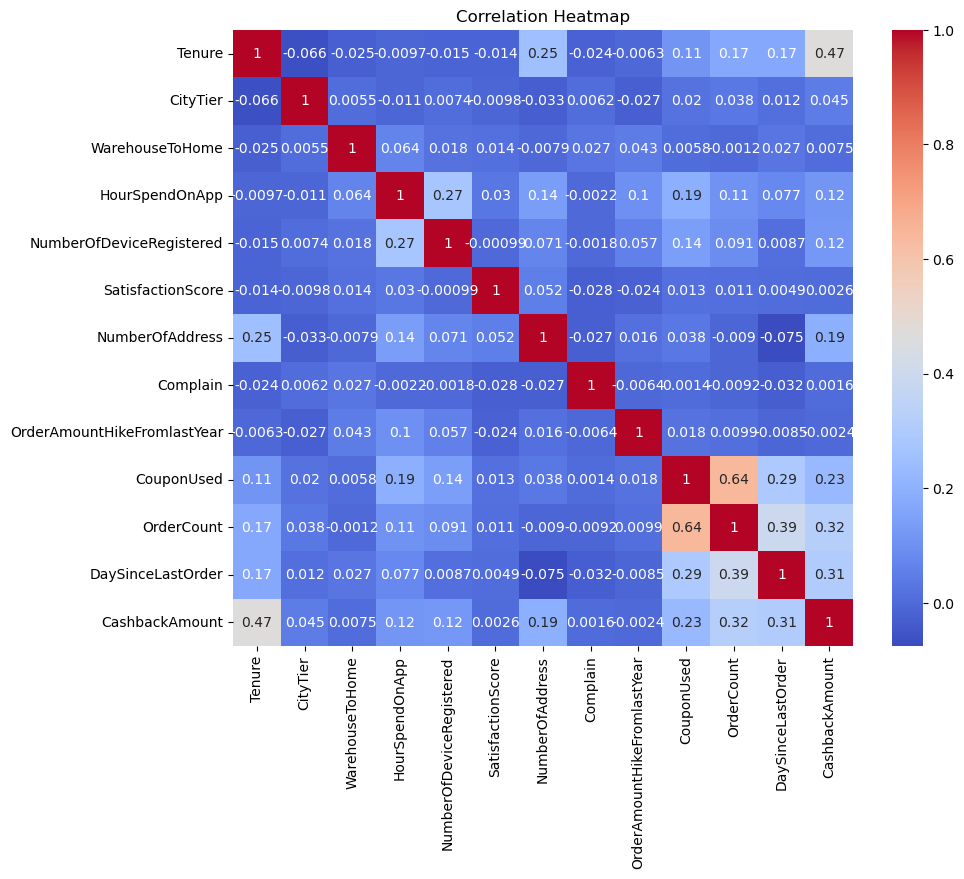

In [57]:
df2 = df.drop('CustomerID', axis=1)
numeric_data = df2.select_dtypes(include='number')

fig = plt.figure(figsize= (10, 8))
correlation_matrix = numeric_data.corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### Feature Selection

I decided to drop any feature that does not have any or little correlation with Churn. Therefore, OrderAmountHikeFromlastYear and HourSpendOnApp are dropped.

In [58]:
churn_corr_vector = numeric_data.corrwith(df['Churn']).sort_values(ascending=False)

# Display the correlation vector
print(churn_corr_vector)

Complain                       0.25
SatisfactionScore              0.11
NumberOfDeviceRegistered       0.08
WarehouseToHome                0.07
CityTier                       0.07
NumberOfAddress                0.03
HourSpendOnApp                 0.00
OrderAmountHikeFromlastYear   -0.01
CouponUsed                    -0.01
OrderCount                    -0.03
CashbackAmount                -0.16
DaySinceLastOrder             -0.17
Tenure                        -0.34
dtype: float64


In [59]:
df_drop= df.drop(["OrderAmountHikeFromlastYear", 'HourSpendOnApp'], axis= 1)

### Label Encoding

In [60]:
X = df.drop('Churn', axis=1).copy()
Y = df['Churn'].copy()

le = LabelEncoder()

for col in X.select_dtypes(include=['object']).columns:
    X[col] = le.fit_transform(X[col])
X.head().style.background_gradient(cmap='YlGnBu')

,CustomerID,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,4.000000,1,3,6.000000,2,0,3.000000,3,2,2,2,9,1,11.000000,1.000000,1.000000,5.000000,159.930000
1,50002,9.000000,1,1,8.000000,4,1,3.000000,4,3,3,2,7,1,15.000000,0.000000,1.000000,0.000000,120.900000
2,50003,9.000000,1,1,30.000000,2,1,2.000000,4,3,3,2,6,1,14.000000,0.000000,1.000000,3.000000,120.280000
3,50004,0.000000,1,3,15.000000,2,1,2.000000,4,2,5,2,8,0,23.000000,0.000000,1.000000,3.000000,134.070000
4,50005,0.000000,1,1,12.000000,1,1,3.000000,3,3,5,2,3,0,11.000000,1.000000,1.000000,3.000000,129.600000


### Handling Imbalanced Data

In [61]:
smt = SMOTETomek(sampling_strategy='auto')
X_res, y_res = smt.fit_resample(X, Y)

In [62]:
X_res.shape,  y_res.shape

((8372, 19), (8372,))

## Modeling

In [63]:
X_scaled = StandardScaler().fit_transform(df[num_cols])
df[num_cols] = pd.DataFrame(X_scaled, columns=df[num_cols].columns)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, 
random_state=42)

In [65]:
from lazypredict.Supervised import LazyClassifier

In [66]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|███████████████████████████████████████████| 29/29 [00:06<00:00,  4.17it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.98,0.98,0.98,0.98,0.39
RandomForestClassifier,0.97,0.97,0.97,0.97,0.67
LGBMClassifier,0.97,0.97,0.97,0.97,0.52
BaggingClassifier,0.95,0.95,0.95,0.95,0.23
LabelPropagation,0.94,0.94,0.94,0.94,0.74
LabelSpreading,0.94,0.94,0.94,0.94,0.96
DecisionTreeClassifier,0.93,0.93,0.93,0.93,0.08
SVC,0.92,0.92,0.92,0.92,0.65
AdaBoostClassifier,0.88,0.88,0.88,0.88,0.40


I will choose top 3 performed models and combine them into an ensembled model using VotingClassifier

In [67]:
from sklearn.metrics import accuracy_score, roc_curve, classification_report, roc_auc_score
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, VotingClassifier
from lightgbm import LGBMClassifier

clf1 = ExtraTreesClassifier(random_state=42)
clf2 = RandomForestClassifier(random_state=42)
clf3 = LGBMClassifier(random_state=42)

In [68]:
model = VotingClassifier(estimators = [
    ('etc', clf1), ('bc', clf2), ('dt', clf3)], voting = 'soft')

In [69]:
model.fit(X_train, y_train)

VotingClassifier(estimators=[('etc', ExtraTreesClassifier(random_state=42)),
                             ('bc', RandomForestClassifier(random_state=42)),
                             ('dt', LGBMClassifier(random_state=42))],
                 voting='soft')

In [70]:
import numpy as np
y_test = np.array(y_test)
y_test = y_test.reshape(-1, 1)

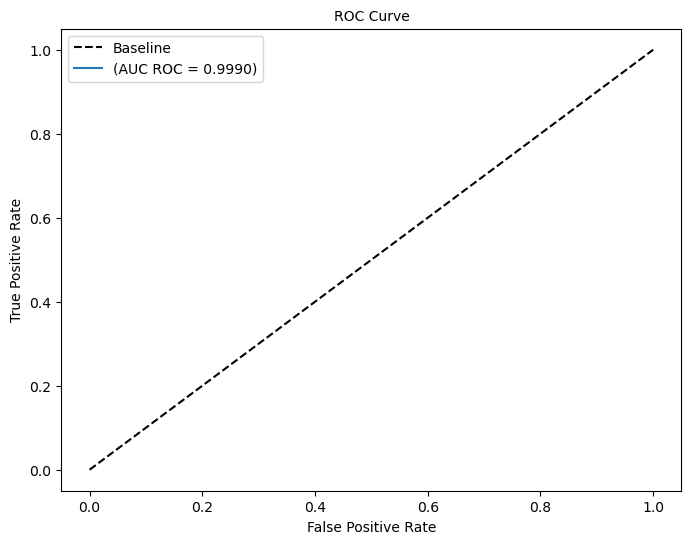

In [71]:
y_probs = model.predict_proba(X_test)
y_probs = y_probs[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_probs, pos_label=1)
auc = round(roc_auc_score(y_test, y_probs), 4)

plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], linestyle='--', label='Baseline', color='black')
plt.plot(fpr, tpr, label=f'(AUC ROC = {auc:.4f})')
plt.legend(loc='best')

plt.ylabel('True Positive Rate', size=10)
plt.xlabel('False Positive Rate', size=10)
plt.title('ROC Curve', size=10)
plt.legend()

plt.show()

We successfully achieve a AUC ROC score with 0.9979, which is a strong indicator that our model's ability to distinguish between the positive and negative classes. Also, the 0.99 accuracy score is a strong indicator that our model is correctly predicting the target variable for approximately 98% of the samples in the customer retail dataset.

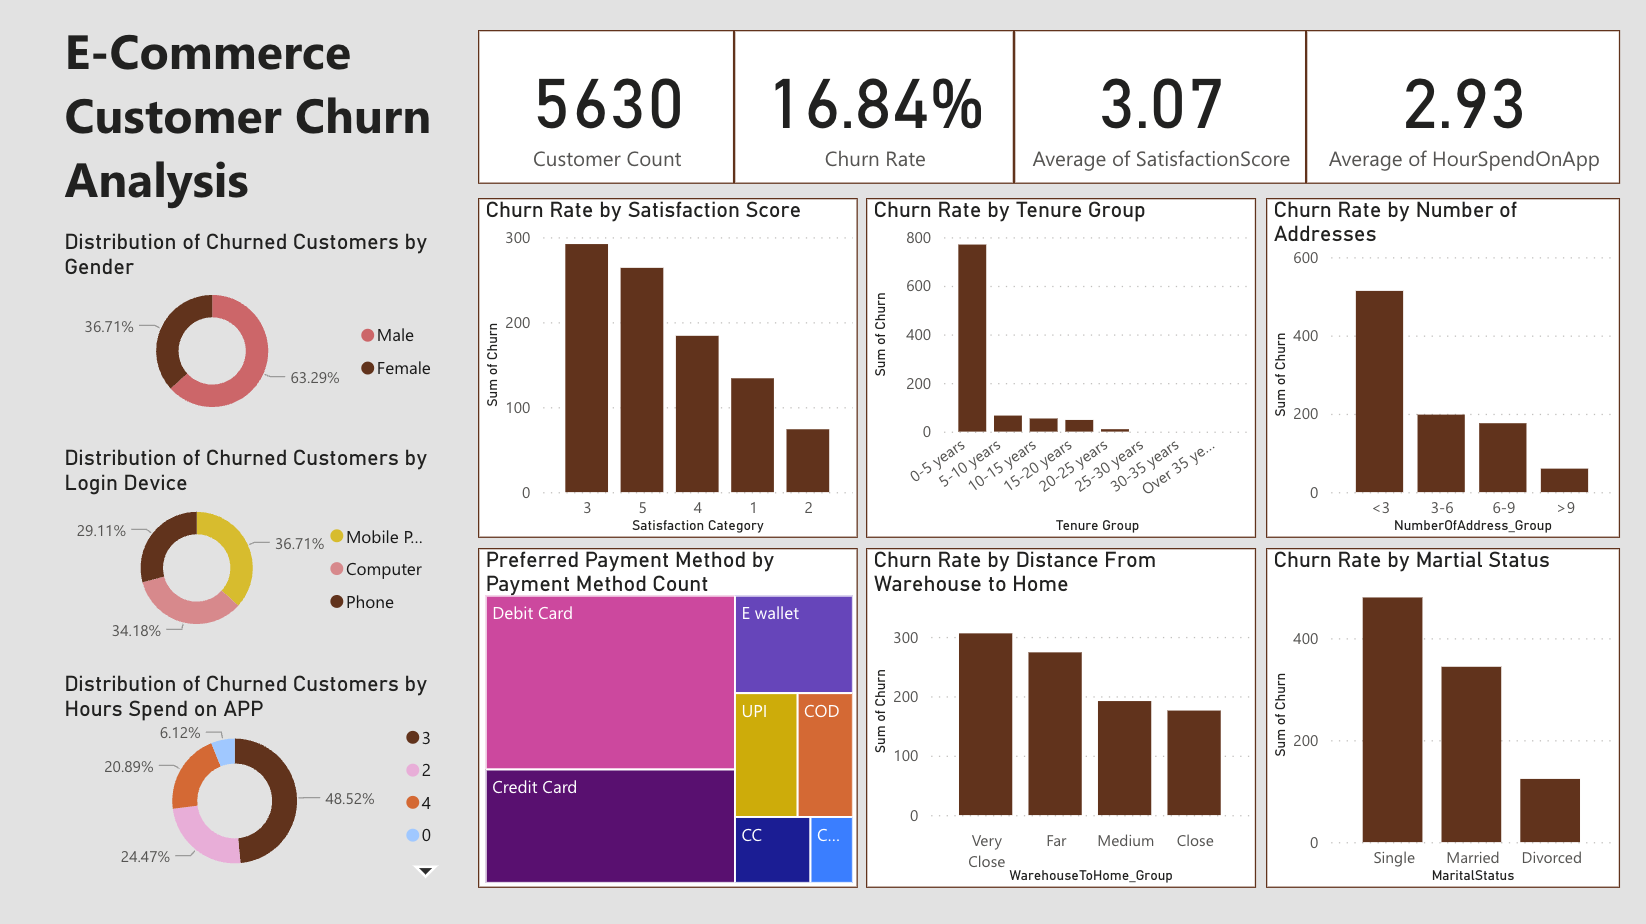

In [91]:
from IPython.display import Image
Image(filename='Dashboard.jpg')